#  This Notebook explores the relationship between Mexico Remittances Received versus Mexico Household Consumption

### Data Source: https://www.kaggle.com/worldbank/world-development-indicators
### Folder: 'world-development-indicators'

In this notebook I have used the dataset covered in class to explore two indicators in the dataset. 

Household final consumption expenditure versus Personal remittances, received for Mexico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Indicators.csv')

In [3]:
data.shape

(5656458, 6)

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [6]:
print(len(countries))
print(len(indicators))

247
1344


There are 247 distinct countries and 1344 distinct indicators in the dataset.

My analysis is going to focus on 1 country and 2 indicators.

In [7]:
remittances = 'Personal remittances, received \(current US'
country = 'Mexico'
consumption = 'Household final consumption expenditure \(current US'
#agriculture = 'Employment in agriculture \(% of total employment'


mask1 = data['IndicatorName'].str.contains(remittances)
mask2 = data['CountryName'].str.contains(country)
mask3 = data['IndicatorName'].str.contains(consumption)
#mask4 = data['IndicatorName'].str.contains(agri)


Above I created variables to hold the strings that I will use to create masks/filsters with the str.contains function

In [8]:
mex_remittances = data[mask1 & mask2]
mex_consumption = data[mask2 & mask3]
#mex_agri = data[mask2 & mask4]

Above I created two datasets

# mex_remittances

which applies the mask to filter for country 'Mexico' and the mask to filter for 'Personal remittances, received'and

# mex_consumption 
which applies the mask to filter for country 'Mexico' and the mask to filter for 'Household final consumption'

I also tried to explore data around agriculture employment but there was only a few data points available and it didn't add to the analysis

In [9]:
mex_remittances.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
985318,Mexico,MEX,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1979,1.770000e+08
1064681,Mexico,MEX,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1980,1.039000e+09
1147917,Mexico,MEX,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1981,1.220000e+09
1232695,Mexico,MEX,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1982,1.226000e+09
1318064,Mexico,MEX,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1983,1.391000e+09


In [10]:
years = mex_remittances['Year'].tolist()
print(min(years)," to ", max(years))

1979  to  2014


In [11]:
mex_consumption.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15317,Mexico,MEX,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1960,1.006864e+10
40766,Mexico,MEX,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1961,1.088552e+10
68566,Mexico,MEX,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1962,1.172704e+10
97130,Mexico,MEX,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1963,1.267080e+10
126041,Mexico,MEX,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1964,1.500952e+10


In [12]:
years1 = mex_consumption['Year'].tolist()
print(min(years1)," to ", max(years1))

1960  to  2014


Household final consumption has ddata going back to 1960 while Personal remittances only has data going back to 1979 so I will create a subset of the mex_consumption data to filter for data greater than 1978

In [13]:
mex_cons_trunc = mex_consumption[mex_consumption['Year'] > 1978]

In [14]:
years2 = mex_cons_trunc['Year'].tolist()
print(min(years2)," to ", max(years2))

1979  to  2014


Now are two datasets match the year range from 1979 to 2014

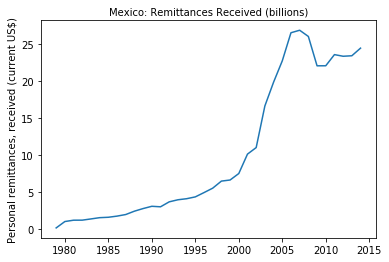

In [15]:
years = mex_remittances['Year'].values
remit = mex_remittances['Value'].values/1000000000


fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(False)
axis.set_title('Mexico: Remittances Received (billions)',fontsize=10)
#axis.set_xlabel(mex_remit['IndicatorName'].iloc[0],fontsize=10)

axis.set_ylabel(mex_remittances['IndicatorName'].iloc[0],fontsize=10)
plt.plot(years, remit)
plt.show()

The graph above shows remittances received have increased over time and peaked around 2005 then decreased. The decrease is around the time of the Great Recession. But remittances show to be increasing in after 2010.

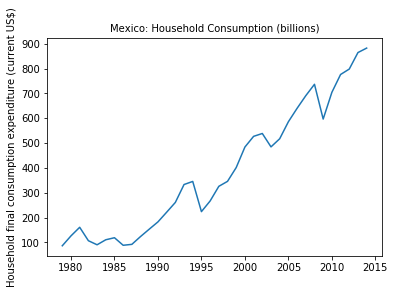

In [16]:
years = mex_cons_trunc['Year'].values
lit = mex_cons_trunc['Value'].values/1000000000
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(False)
axis.set_title('Mexico: Household Consumption (billions)',fontsize=10)
#axis.set_xlabel(mex_remit['IndicatorName'].iloc[0],fontsize=10)

axis.set_ylabel(mex_cons_trunc['IndicatorName'].iloc[0],fontsize=10)
plt.plot(years, lit)
plt.show()



The graph above shows Household consumption has increased with a few dips. There is also a dip in consumption around 2007 which matches the dip in remittances.

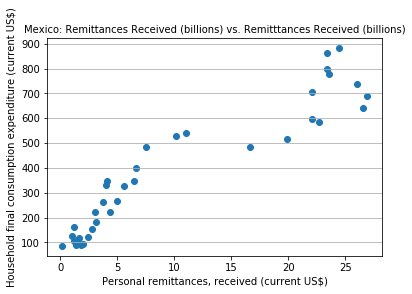

In [17]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Mexico: Remittances Received (billions) vs. Remitttances Received (billions)',fontsize=10)
axis.set_xlabel(mex_remittances['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(mex_cons_trunc['IndicatorName'].iloc[0],fontsize=10)

#plt.ticklabel_format(useOffset=1000)

X = mex_remittances['Value']/1000000000
Y = mex_cons_trunc['Value']/1000000000

axis.scatter(X, Y)
plt.show()

The scatter plot above shows that remittances received and household consumption are closely related. There are a few points where the remittances received ranged from 10-20 billion and household consumption stayed around 500 billion. Other than those points, higher remittances correlated to higher household consumption. 

In [18]:
np.corrcoef(mex_remittances['Value'],mex_cons_trunc['Value'])

array([[1.        , 0.93830092],
       [0.93830092, 1.        ]])

# There is a 0.938 correlation 

## There are no clear outliers so these two indicators are strongly correlated. 
## However, correlation does not equal causation so we can't say with certainty that higher remittances cause higher household consumption.